In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew, kurtosis, shapiro

In [2]:
import matplotlib as mpl

mpl.rcParams['text.color'] = 'w'
mpl.rcParams['xtick.color'] = 'w'
mpl.rcParams['ytick.color'] = 'w'
mpl.rcParams['axes.labelcolor'] = 'w'
mpl.rcParams['axes.facecolor'] = '#323232'

In [52]:
# be sure to check OTGLY stock
start_date = "2010-01-01"
end_date = "2020-01-01"
stocks = "AZN BYND FB VTI AAPL PYPL DIS MSFT GOOGL"
data = yf.download(stocks, start=start_date, end=end_date, group_by="ticker")

[*********************100%***********************]  9 of 9 completed


In [53]:
data = data.loc[:, pd.IndexSlice[:, 'Adj Close']]
data.columns = data.columns.get_level_values(0)

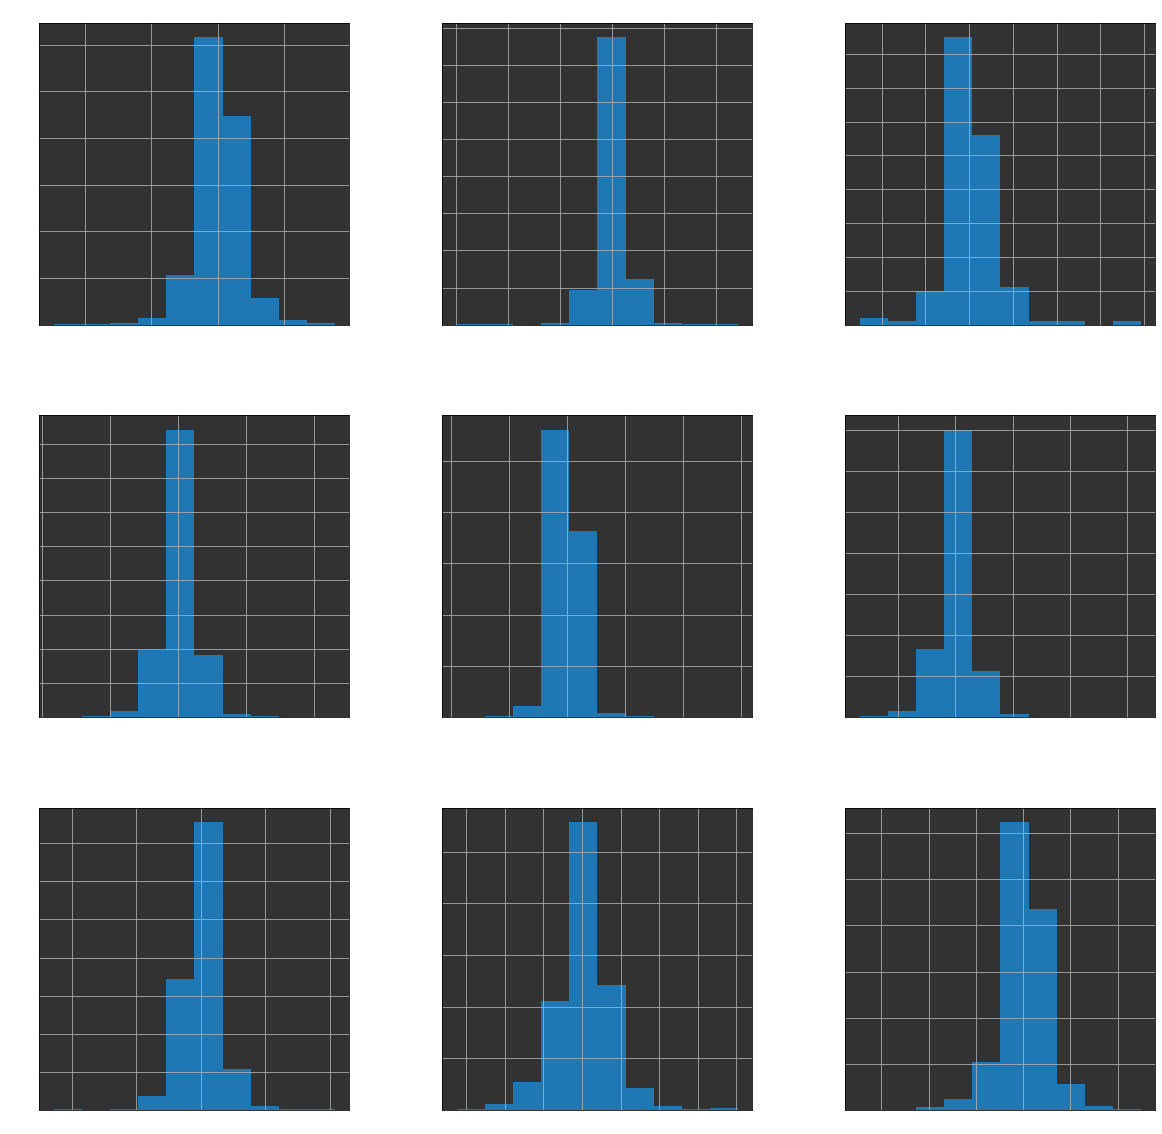

In [54]:
return_data = data.pct_change()
return_data.hist(figsize=(20, 20))
plt.show()

In [55]:
annualized_mean_return = ((1 + return_data.mean()) ** 252) - 1
annualized_return_variance = (return_data.std() * np.sqrt(252)) ** 2 
annualized_mean_return
print("Mu: {}, Variance: {}".format(annualized_mean_return, annualized_return_variance))

Mu: FB       0.330336
AZN      0.202710
VTI      0.147337
DIS      0.204722
PYPL     0.325329
BYND     1.009388
GOOGL    0.192259
MSFT     0.239076
AAPL     0.316833
dtype: float64, Variance: FB       0.130855
AZN      0.050516
VTI      0.022525
DIS      0.044278
PYPL     0.082103
BYND     1.013046
GOOGL    0.059247
MSFT     0.051622
AAPL     0.066292
dtype: float64


In [56]:
# a positive skewness suggests better return
skew(return_data.dropna())

array([-0.80954488,  0.81154838, -0.8835907 ,  0.80534431,  0.27721558,
        1.12650368,  1.13770993, -0.50665317, -0.71916539])

In [57]:
# excess kurtosis = kurtosis + 3
kurtosis(return_data.dropna()) + 3

array([ 5.58166528,  6.32919774,  5.25450679,  9.33951609,  6.30863857,
       13.04711148, 14.74638993,  3.67808136,  4.9234498 ])

In [58]:
# check normal distribution
shapiro(return_data['PYPL'].dropna())

(0.9603368043899536, 5.580969725794047e-17)

In [59]:
# BYND is not so familiar to you
del return_data['BYND']

In [60]:
equal_weights = np.full(8, 0.125)

In [61]:
equal_weighted_return = return_data * equal_weights
equal_weighted_return

,FB,AZN,VTI,DIS,PYPL,GOOGL,MSFT,AAPL
Date,,,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,0.001252,0.002084,-0.000698,NaN,0.001365,0.001927,0.001946
2010-01-05,NaN,-0.002531,0.000480,-0.000312,NaN,-0.000550,0.000040,0.000216
2010-01-06,NaN,-0.000996,0.000174,-0.000664,NaN,-0.003151,-0.000767,-0.001988
2010-01-07,NaN,0.001356,0.000521,0.000039,NaN,-0.002910,-0.001300,-0.000231
...,...,...,...,...,...,...,...,...
2019-12-24,-0.000643,-0.000050,0.000028,0.000527,0.000092,-0.000574,-0.000024,0.000119
2019-12-26,0.001627,-0.000050,0.000604,0.000353,0.001219,0.001677,0.001025,0.002480
2019-12-27,0.000186,0.001479,-0.000114,0.000043,-0.000399,-0.000718,0.000228,-0.000047


In [62]:
# lengths are not equal, kinda meaningless
return_sum = equal_weighted_return.sum(axis=0)
# equal_weighted_return.isna().sum()
return_count = equal_weighted_return.notna().sum()
return_sum.div(return_count)


FB       0.000142
AZN      0.000092
VTI      0.000068
DIS      0.000092
PYPL     0.000140
GOOGL    0.000087
MSFT     0.000106
AAPL     0.000137
dtype: float64

In [63]:
cumulative_stock_return = ((1 + equal_weighted_return).cumprod() - 1)
cumulative_stock_return

,FB,AZN,VTI,DIS,PYPL,GOOGL,MSFT,AAPL
Date,,,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,0.001252,0.002084,-0.000698,NaN,0.001365,0.001927,0.001946
2010-01-05,NaN,-0.001283,0.002565,-0.001009,NaN,0.000814,0.001968,0.002162
2010-01-06,NaN,-0.002277,0.002740,-0.001673,NaN,-0.002340,0.001199,0.000170
2010-01-07,NaN,-0.000924,0.003262,-0.001634,NaN,-0.005243,-0.000102,-0.000062
...,...,...,...,...,...,...,...,...
2019-12-24,0.301545,0.254207,0.184920,0.258124,0.168594,0.240318,0.301277,0.397105
2019-12-26,0.303663,0.254144,0.185636,0.258568,0.170019,0.242399,0.302611,0.400570
2019-12-27,0.303906,0.256000,0.185501,0.258622,0.169553,0.241506,0.302908,0.400504


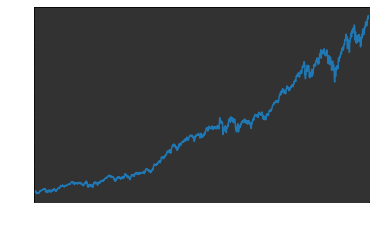

In [64]:
equal_return = return_data.iloc[:, 0:9].mul(equal_weights, axis=1).sum(axis=1)
cumulative_equal_return = ((1 + total_return).cumprod() - 1)
cumulative_equal_return.plot()
plt.show()

In [65]:
stock_list = [stock for stock in stocks.split()]
company_cap = np.array([])
for item in stock_list:
    try:
        cap = yf.Ticker(item).info['marketCap']
        company_cap = np.append(company_cap, cap)
        print(item, cap)
    except:
        cap = 'None'
        company_cap = np.append(company_cap, cap)
        print(item, cap)


AZN 129860689920
BYND 7292806144
FB 600960335872
VTI None
AAPL 1386808344576
PYPL 140596150272
DIS 251245035520
MSFT 1373538615296
GOOGL 1033548136448


In [66]:
company_cap
total_cap = company_cap[company_cap != np.array(None)].sum()

In [67]:
market_cap_weights = company_cap[company_cap != np.array(None)] / total_cap

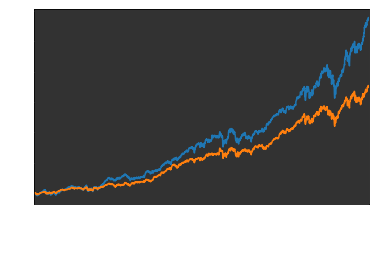

In [68]:
market_cap_weights
market_cap_total_return = return_data.iloc[:, 0:9].mul(market_cap_weights, axis=1).sum(axis=1)
cumulative_market_cap_return = (1 + market_cap_total_return).cumprod() - 1
cumulative_market_cap_return.plot()
cumulative_equal_return.plot()
plt.show()

In [69]:
return_data.corr()

,FB,AZN,VTI,DIS,PYPL,GOOGL,MSFT,AAPL
FB,1.000000,0.162826,0.404955,0.231209,0.511896,0.418642,0.313118,0.285037
AZN,0.162826,1.000000,0.473174,0.328377,0.236492,0.296803,0.338770,0.262655
VTI,0.404955,0.473174,1.000000,0.684449,0.608690,0.630058,0.682875,0.588830
DIS,0.231209,0.328377,0.684449,1.000000,0.310876,0.414336,0.438827,0.364616
PYPL,0.511896,0.236492,0.608690,0.310876,1.000000,0.520532,0.601789,0.474944
GOOGL,0.418642,0.296803,0.630058,0.414336,0.520532,1.000000,0.536357,0.463199
MSFT,0.313118,0.338770,0.682875,0.438827,0.601789,0.536357,1.000000,0.457443
AAPL,0.285037,0.262655,0.588830,0.364616,0.474944,0.463199,0.457443,1.000000
